# Pymaceuticals Inc.
---

### Analysis

In [253]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [254]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()


249

In [255]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicate = combined_df.duplicated(["Mouse ID", "Timepoint"])
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [256]:
# Optional: Get all the data for the duplicate mouse ID. 
data = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [257]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean = combined_df.set_index(["Mouse ID"])
clean_data = clean.drop_duplicates()
clean_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [258]:
# Checking the number of mice in the clean DataFrame.
clean_data.index.nunique()

248

## Summary Statistics

In [259]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_data = clean_data.reset_index()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = stat_data.groupby("Mouse ID")

# mean of the tumor volume
tumor_mean = grouped_data["Tumor Volume (mm3)"].mean()

# median of the tumor volume
tumor_median = grouped_data["Tumor Volume (mm3)"].median()

# variance of the tumor volume 
tumor_variance = grouped_data["Tumor Volume (mm3)"].var()
# standard deviation of the tumor volume 
tumor_stdev = grouped_data["Tumor Volume (mm3)"].std()
tumor_stdev
# SEM of the tumor volume
tumor_sem = grouped_data["Tumor Volume (mm3)"].sem()
tumor_sem
# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean of Tumor Volume": tumor_mean, 
                             "Median of Tumor Volume": tumor_median,
                             "Variation of Tumor Volume": tumor_variance,
                             "Standard deviation of Tumor Volume": tumor_stdev,
                             "SEM of Tumor Value": tumor_sem})

summary_stat

,Mean of Tumor Volume,Median of Tumor Volume,Variation of Tumor Volume,Standard deviation of Tumor Volume,SEM of Tumor Value
Mouse ID,,,,,
a203,56.312708,55.983272,50.407041,7.099792,2.245151
a251,55.237095,55.938620,51.740730,7.193103,2.274659
a262,58.611631,58.572588,84.759928,9.206515,2.911356
a275,52.770965,52.044750,36.322924,6.026850,1.905857
a366,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...
z435,46.942214,47.115980,3.464898,1.861424,1.074693
z578,37.679456,37.815935,14.186915,3.766552,1.255517
z581,53.979584,53.062175,29.827123,5.461421,1.727053


In [260]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = stat_data.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})
summary_statistics

Tumor Volume (mm3)                                          
                       mean     median        var       std       sem
Mouse ID                                                             
a203              56.312708  55.983272  50.407041  7.099792  2.245151
a251              55.237095  55.938620  51.740730  7.193103  2.274659
a262              58.611631  58.572588  84.759928  9.206515  2.911356
a275              52.770965  52.044750  36.322924  6.026850  1.905857
a366              54.639906  55.265582  38.415384  6.198015  2.342629
...                     ...        ...        ...       ...       ...
z435              46.942214  47.115980   3.464898  1.861424  1.074693
z578              37.679456  37.815935  14.186915  3.766552  1.255517
z581              53.979584  53.062175  29.827123  5.461421  1.727053
z795              54.880317  55.613879  53.416711  7.308674  2.311206
z969              60.194652  60.522215  94.626337  9.727607  3.076139

[248 rows x 5 columns]

## Bar and Pie Charts

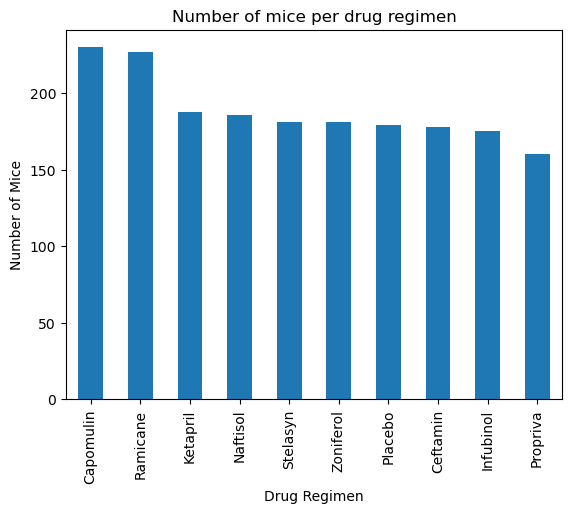

In [261]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

per_drug = clean_data["Drug Regimen"].value_counts()


bar_plot = per_drug.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice", title="Number of mice per drug regimen")


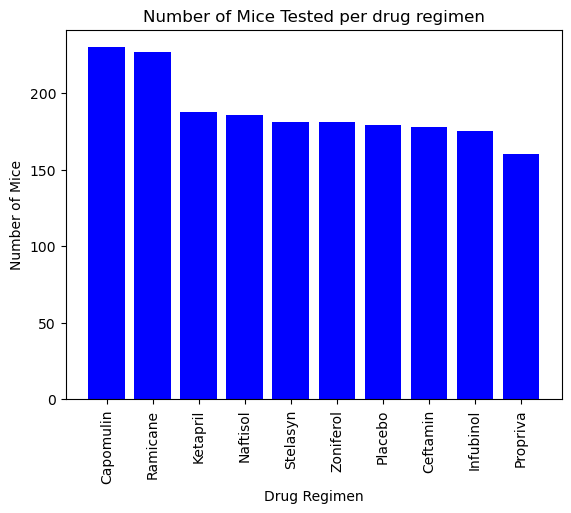

In [262]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = per_drug.index
y = per_drug.values

plt.bar(x, y, color="b", align='center')
plt.title("Number of Mice Tested per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


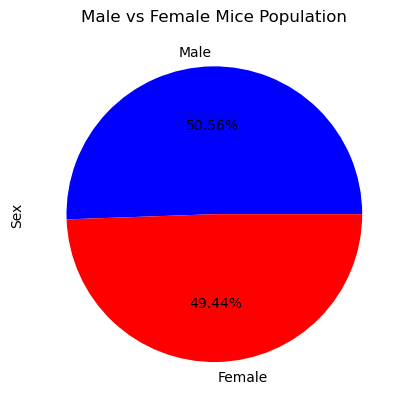

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_data["Sex"].value_counts()
mice_gender.plot(kind="pie", title= "Male vs Female Mice Population", autopct="%.2f%%", colors=["blue", "red"])
plt.show()




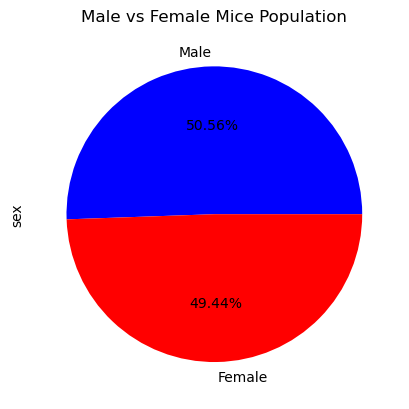

In [264]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, autopct="%.2f%%", labels=["Male", "Female"], colors=["blue", "red"])
plt.title("Male vs Female Mice Population")
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [265]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment = clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")|
                            (clean_data["Drug Regimen"]=="Ramicane")| 
                            (clean_data["Drug Regimen"]=="Infubinol")|
                              (clean_data["Drug Regimen"]=="Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_treatment.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.DataFrame.merge(four_treatment, last_timepoint, on=("Mouse ID", "Timepoint")).reset_index()
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [266]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    plot_df = merge_df.loc[merge_df["Drug Regimen"]== treatment]
    

# Add the tumor volumes to the tumor_vol_data list
    tumor_volumes = plot_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    print(f'The interquartile range for {treatment}: {iqr}')


    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    print(f"Values below {lower_bound} in {treatment} could be outliers.")
    print(f"Values above {upper_bound} in {treatment} could be outliers.")

    outliers = (tumor_volumes.loc[(tumor_volumes >= upper_bound)|
                                 (tumor_volumes <= lower_bound)]).count()

    if outliers > 0:
        outlier = tumor_volumes.loc[(tumor_volumes >= upper_bound)|
                                 (tumor_volumes <= lower_bound)]
        outlier_list = outlier.values.tolist()

        print(f"Outliers for {treatment}: {outlier_list}")
    else:
        print(f"Outliers for {treatment}: {outliers}")

The interquartile range for Capomulin: 7.781863460000004
Values below 20.70456164999999 in Capomulin could be outliers.
Values above 51.83201549 in Capomulin could be outliers.
Outliers for Capomulin: 0
The interquartile range for Ramicane: 9.098536719999998
Values below 17.912664470000003 in Ramicane could be outliers.
Values above 54.30681135 in Ramicane could be outliers.
Outliers for Ramicane: 0
The interquartile range for Infubinol: 11.477135160000003
Values below 36.83290494999999 in Infubinol could be outliers.
Values above 82.74144559000001 in Infubinol could be outliers.
Outliers for Infubinol: [36.3213458]
The interquartile range for Ceftamin: 15.577752179999997
Values below 25.355449580000002 in Ceftamin could be outliers.
Values above 87.66645829999999 in Ceftamin could be outliers.
Outliers for Ceftamin: 0


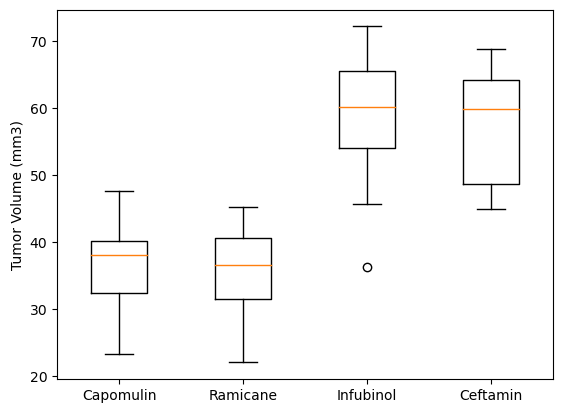

In [267]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

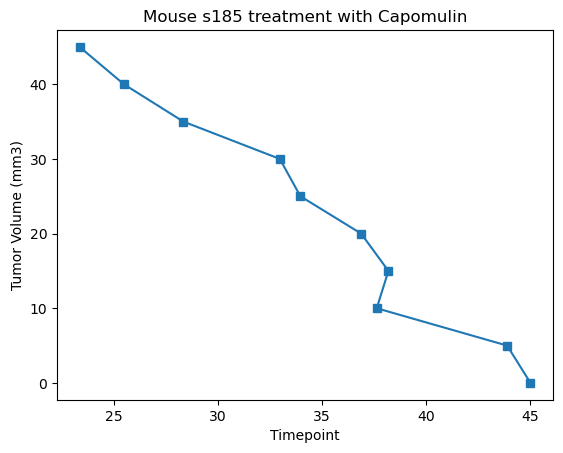

In [268]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Locate a Capomulin moice
locate_mouse = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
Capomulin_mouse = locate_mouse.reset_index()
s185 = Capomulin_mouse.loc[Capomulin_mouse["Mouse ID"]=="s185"]

# Generate tumor volume vs. time point data for Campomulin mouse

plt.plot(s185["Tumor Volume (mm3)"],s185["Timepoint"], marker='s')
plt.ylabel("Tumor Volume (mm3)") 
plt.xlabel("Timepoint")
plt.title("Mouse s185 treatment with Capomulin")
plt.show()

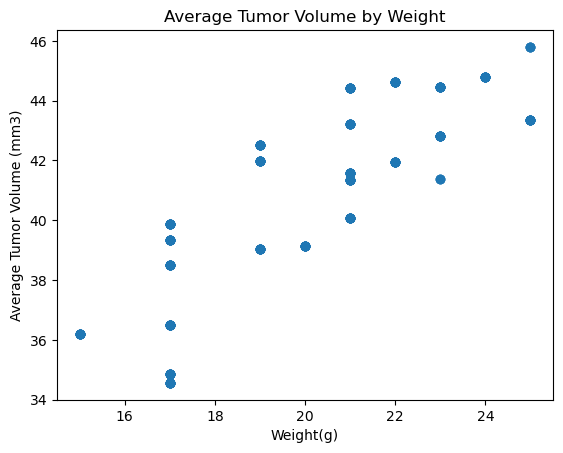

In [269]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor = locate_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

average_df = pd.DataFrame.merge(locate_mouse, average_tumor, on="Mouse ID")
plot_average_df = average_df.rename(columns={"Tumor Volume (mm3)_y":"Average Tumor Volume (mm3)",
                                    "Tumor Volume (mm3)_x":"Tumor Volume (mm3)"})

plt.scatter(plot_average_df["Weight (g)"], plot_average_df["Average Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()

## Correlation and Regression

The correlation coefficient between weight and tumor volume is 0.83
The r-squared is: 0.6962164535925294


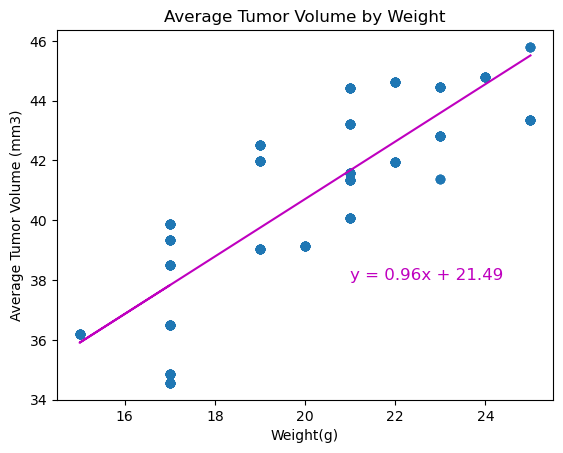

In [305]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = plot_average_df["Weight (g)"]
tumor_vol = plot_average_df["Average Tumor Volume (mm3)"]

# The correlation coefficient value
correlation = st.pearsonr(weight,tumor_vol)
print(f'The correlation coefficient between weight and tumor volume is {round(correlation[0],2)}')

# The linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")


# Plot linear regression on the scatter plot
plt.scatter(weight, tumor_vol)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.plot(weight,regress_values,"m-")

# Annotate linear regression
plt.annotate(line_eq,(21,38),fontsize=12,color="m")

plt.show()
